<a href="https://colab.research.google.com/github/gustavesg/Population-Models/blob/main/Harrison_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lotka Volterra Equations

The Lotka-Volterra model is the simplest population growth model used to describe prey and predator dynamics. It assumes that, in the absence of predators, the prey population would grow exponentially (Malthusian growth), and that, in the absence of prey, the predator population would decrease exponentially. In this equation, H and P represent the prey and predator populations at time t, respectively. The b parameter represents the prey reproduction rate, s represents the predator's hunting efficiency, d represents predator mortality and e represents the efficiency with which predators can convert food into offspring.

$$\dot{H} = bH - sHP$$
$$\dot{P} = -dP + esHP$$

#Equilibrium Points

When we have $\dot{h} = 0$ and  $\dot{p} = 0$ we called the $(h,p)$ an equilibrium point, this is because prey and predator populations tend to remain constant in an ideal scenario. An equilibrium point can be L-stable or L-unstable. When the point is stable, we can guarantee that, no matter how close we choose the initial point, the function will be sufficiently near to the equilibrium point.

#Modified Equations

When there is no predator present, the first equation has an exponential solution, which suggests that population growth in this scenario is Maltusian. In real life, we don't have this situation because, when the population grows, the environment can't cope, i.e. there is a saturation point for its growth, which makes sense. To take this into account in our model, we can consider the growth described by a logistic regression and add the term $(1-H/K)$ to the first equation, where K represents the ability of the environment to support the number of individuals of a species

$$\dot{H} = bH(1-H/K) - sHP$$
$$\dot{P} = -dP + esHP$$

In [ ]:
#import libraries

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
# Define Lotka-Volterra function that returns temporal derivates

def modified_lotka_volterra(y, t, b,s,d,e,k):

    H,P = y

    dHdt = b*H*(1-H/k)  - s*H*P
    dPdt = -d*P +  e*s*H*P

    return [dHdt, dPdt]

In [ ]:
# Parameters

# prey growth rate
b = 0.2

# predation rate
s = 0.02

# predator death rate
d = 0.4

# conversion efficiency
e = 0.5

#nature capacity rate
k = 300

In [ ]:
#Equilibric points of EDO

eq_HO = d/(e*s)
eq_PO = (b/s)*(1 - (d/(k*e*s)))

# initial prey population
H0 = 210

# initial predator population
P0 = 36

y0 = [H0, P0]

# Time points: 200 time units with 200 points
t = np.linspace(0, 500, 2000)

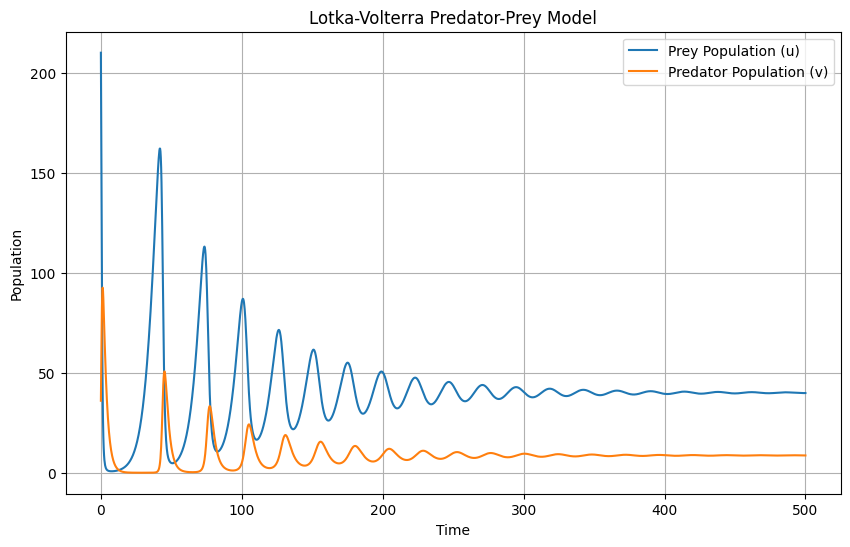

<Figure size 800x800 with 0 Axes>

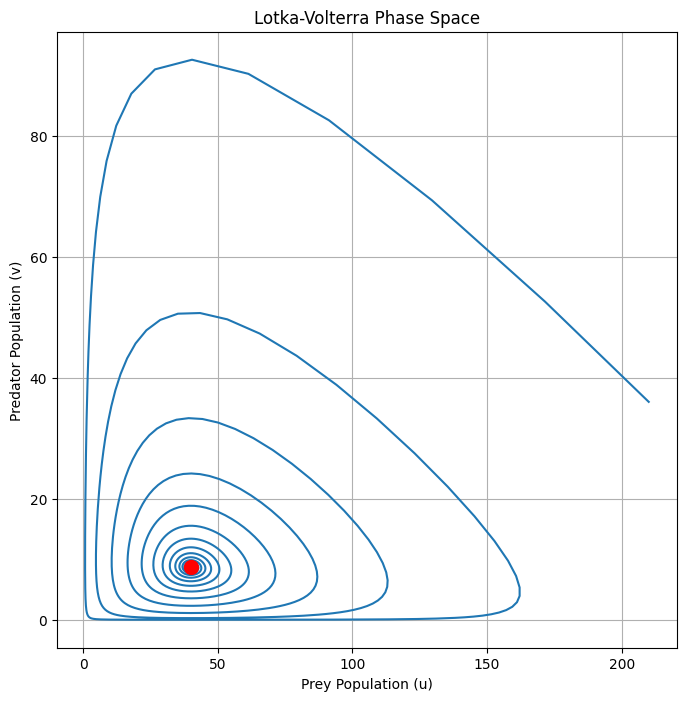

In [ ]:
# Solve the ODEs
solution = odeint(modified_lotka_volterra, y0, t, args=(b,s,d,e,k))

# Extract populations
prey_population = solution[:, 0]
predator_population = solution[:, 1]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, prey_population, label='Prey Population (u)')
plt.plot(t, predator_population, label='Predator Population (v)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the phase space (predator vs. prey)
plt.figure(figsize=(8, 8))

# Plotting the phase space (predator vs. prey)
plt.figure(figsize=(8, 8))
plt.plot(prey_population, predator_population, label='Trajetória')


plt.scatter(eq_HO, eq_PO , color='red', s=100, label='Ponto específico',zorder = 5)
plt.xlabel('Prey Population (u)')
plt.ylabel('Predator Population (v)')
plt.title('Lotka-Volterra Phase Space')
plt.grid(True)
plt.show()

#Funtional and Numerical Responses and more realistic Models



In a prey-predator system, we define functional response as the rate at which prey density is converted into predator consumption. In the Lotka-Volterra model, we consider $sH$ as the functional response, which means that the predator consumption is not superiorly bounded — a somewhat unrealistic situation, as the predators have a consumption capacity limit as the prey population grows. To take this into account, we can express the functional response as either $sH / (b + H)$ if the predator is prey-oriented, or $sH^2 / (b + H^2)$ if the predator is two-prey-oriented.

Harrisson find a model like this that combined very well in Luckinbill Data, where $r_{H}$ is the prey birth rate, $K$ is the carrying capacity, $a_{H}$ is predatation rate, $a_{p}$ conversion rate that food is transformed in growth by the predators and $c$ is the intraespecific effect in the predator population.

$$\dot{H} = r_{H} H \left(1-\frac{H}{K}\right) - \frac{a_{H}PH}{b+H}$$

$$\dot{P} = \frac{a_{p}PH}{b+H} - cP$$


Doing $(\dot{H},\dot{P}) = (0,0)$ we can find the $(H^{*},P^{*})$ non trivial equilibrium point and we can define this point based point variables to rewrite the sistem: $h = \frac{H}{H^{*}}$, $p = \frac{p}{P^{*}}$, $\tau = r_{H}t$, $ k = \frac{K}{H^{*}}$, $\beta = \frac{b}{H}$, $\gamma = \frac{c}{r}$, $\alpha_{h} = \left( 1- \frac{1}{k})(1 + \beta \right)$ and $\alpha_{p} = \gamma (1+\beta)$ :


$$\frac{dh}{d\tau} = h\left(1-\frac{h}{k}\right) - \frac{\alpha_{H}ph}{\beta +h}$$

$$\frac{dp}{d\tau} = \frac{\alpha_{p}ph}{\beta+h} - \gamma p$$

The non trivial equilibrium poin of this simplified sistem is $(1,1)$, so in order to find the next this point behaviour we calculaded the Jacobian Matrix of this sistem and evaluate her value in point $(1,1)$:

$$
J_{1,1} =
\left[
\begin{array}{cc}
\frac{k-\beta-2}{k(1+\beta)} & \frac{1}{k} - 1 \\
\frac{\beta \gamma}{1+\beta} & 0
\end{array}
\right]
$$

To guarantee that the point is an attractive and stable equilibrium, all eigenvalues must be negative. For this, we require that $ \mathrm{tr}(J_{1,1}) < 0 $ and $ \det(J_{1,1}) > 0 $, which implies that $ k < 2 + \beta $.
Therefore, when $ k < 2 + \beta $, the trajectories will converge to the point $(1,1)$;
when $ k > 2 + \beta $, the trajectories will form closed orbits (limit cycles) around this point;
and when $ k = 2 + \beta $, the system is at the threshold of transitioning to convergence toward the fixed point.


In [ ]:
# Define harrison function that returns temporal derivatives
def harrison(y, t, k, beta, gamma):
    h, p = y

    # safeguard to prevent division by zero
    if h <= 1e-8:
        h = 1e-8

    dhdt = h * (1 - h/k) - (1 - 1/k) * (1 + beta) * h * p / (beta + h)
    dpdt = gamma * (1 + beta) * h * p / (beta + h) - gamma * p

    return [dhdt, dpdt]

In [ ]:
# Parameters

beta = 0.5
k = 3.5
gamma = 1


In [ ]:
# initial prey population
h0 = 1.5

# initial predator population
p0 = 2

y0 = [h0, p0]

# Time points: 200 time units with 200 points
t = np.linspace(0, 100, 1000)

In [ ]:
# Solve the ODEs
solution = odeint(harrison, y0, t, args=(k,beta,gamma))

# Extract populations
prey_population = solution[:, 0]
predator_population = solution[:, 1]


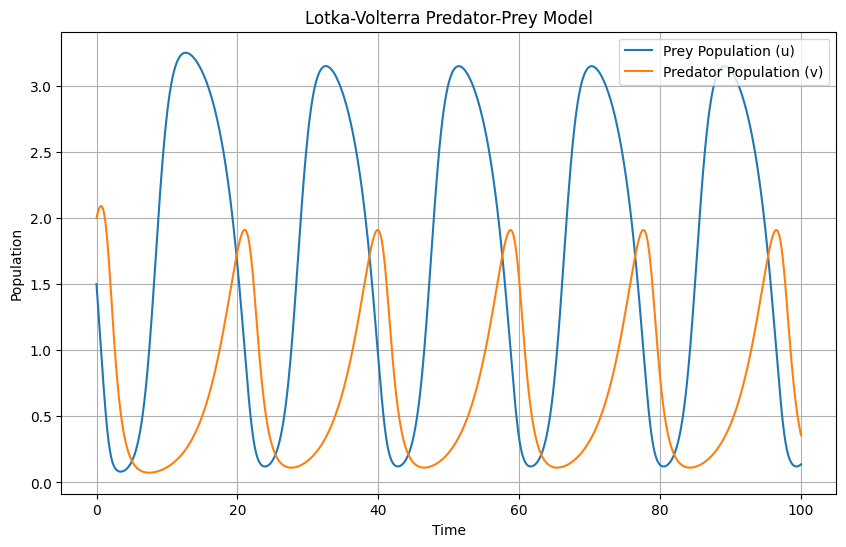

<Figure size 800x800 with 0 Axes>

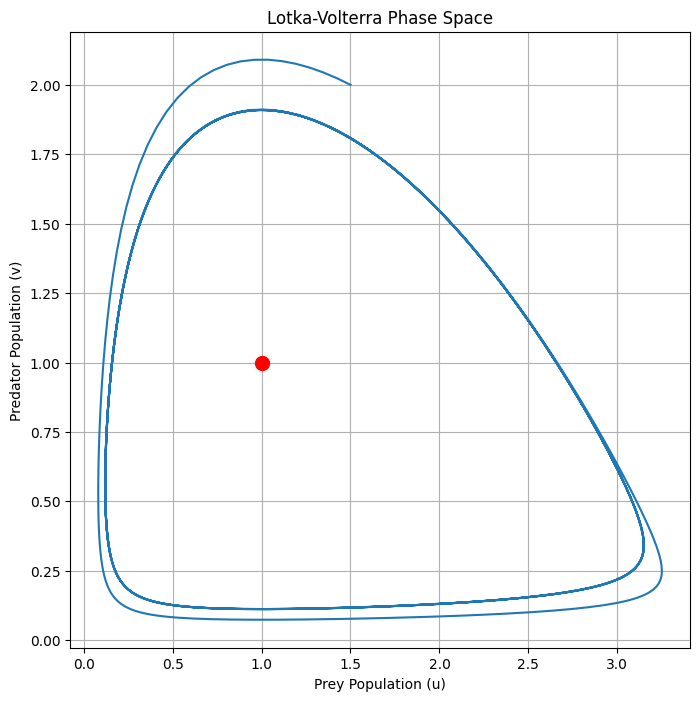

In [ ]:
# Solve the ODEs
solution = odeint(harrison, y0, t, args=(k,beta,gamma))

# Extract populations
prey_population = solution[:, 0]
predator_population = solution[:, 1]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, prey_population, label='Prey Population (u)')
plt.plot(t, predator_population, label='Predator Population (v)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the phase space (predator vs. prey)
plt.figure(figsize=(8, 8))

# Plotting the phase space (predator vs. prey)
plt.figure(figsize=(8, 8))
plt.plot(prey_population, predator_population, label='Trajetória')


plt.scatter(1,1 , color='red', s=100, label='Ponto específico',zorder = 5)
plt.xlabel('Prey Population (u)')
plt.ylabel('Predator Population (v)')
plt.title('Lotka-Volterra Phase Space')
plt.grid(True)
plt.show()